In [3]:
import numpy as np
import pandas as pd


In [4]:
data=pd.read_csv("./MadaLine.csv")
data

,-0.6428225514512513,0.7206064750881910,0.0
0,-0.218126,0.677263,0.0
1,-0.582930,-0.347496,0.0
2,0.285127,0.091750,0.0
3,-0.335577,-0.313893,0.0
4,0.317395,-0.523315,0.0
...,...,...,...
194,0.744066,-1.206548,1.0
195,-0.457547,1.286227,1.0
196,-1.020000,-0.783926,1.0
197,1.363429,-0.800250,1.0


In [5]:
data.columns

Index(['-0.6428225514512513', '0.7206064750881910', '0.0'], dtype='object')

In [6]:
data.index

RangeIndex(start=0, stop=199, step=1)

In [7]:
X1=data.iloc[:,0]
X2=data.iloc[:,1]
target=data.iloc[:,2]
class1=data.loc[data["0.0"]==0,:]
class2=data.loc[data["0.0"]==1,:]
class2

,-0.6428225514512513,0.7206064750881910,0.0
99,0.260903,-1.250070,1.0
100,0.419417,-1.343806,1.0
101,0.863474,-0.982626,1.0
102,0.386490,1.530069,1.0
103,-0.436805,1.171760,1.0
...,...,...,...
194,0.744066,-1.206548,1.0
195,-0.457547,1.286227,1.0
196,-1.020000,-0.783926,1.0
197,1.363429,-0.800250,1.0


/home/amir/uni/nndl/venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


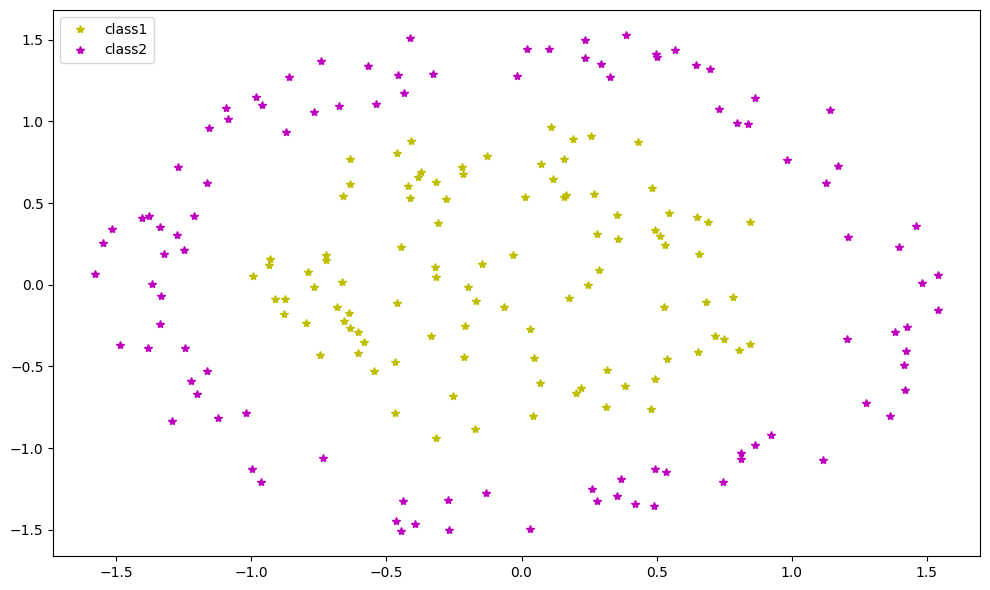

In [8]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.autolayout"] = True


plt.plot( class1.iloc[:,0],class1.iloc[:,1],"y*")
plt.plot(class2.iloc[:,0], class2.iloc[:,1], 'm*')
plt.legend(["class1","class2"],loc="upper left")
plt.show()

In [9]:
class Adaline(object):
    """ Adaline (Adaptive Linear Neuron) for binary classification.
        Minimises the cost function using gradient descent. """

    def __init__(self, learn_rate = 0.01, iterations = 100):
        self.learn_rate = learn_rate
        self.iterations = iterations


    def fit(self, X, y, biased_X = False, standardised_X = False):
        """ Fit training data to our model """
        if not standardised_X:
            X = self._standardise(X)
        if not biased_X:
            X = self._add_bias(X)
        self._initial_weights(X)
        self.cost = []
        # print("xshape",X.shape)
        for i in range(self.iterations):
            # output_pred = self._activation(self._net_input(X))
            output_pred = self.predict(X, biased_X=True)
            # print("output_pred:",output_pred.shape)
            errors = y - output_pred
            # errors = errors.reshape(1, -1)
            # print('errors shape', errors.shape)
            self.weights[0:2] += (self.learn_rate * X[:,0:2].T.dot(errors))
            self.weights[2] += (self.learn_rate * errors).sum()
            cost = (errors**2).sum() / 2.0
            cond =  self.learn_rate * (errors.reshape(1, -1).T * X)
            self.cost.append(cost)

            if np.all(cond > 0):
                # self.cost.append(cost)
                # print("end")
                return self
            else:
                # print("continue")
                continue
        return self



    def _net_input(self, X):
        """ (weighted sum) """
        return np.dot(X, self.weights)


    def predict(self, X, biased_X=False):
        """ Make predictions """
        if not biased_X:
            X = self._add_bias(X)
        return np.where(self._activation(self._net_input(X)) >= 0.0, 1, 0)


    def _add_bias(self, X):
        """ Add a bias column of 1's to our data, X """
        bias = np.ones((X.shape[0], 1))
        biased_X = np.hstack((bias, X))
        return biased_X


    def _initial_weights(self, X):
        """ Initialise weigths - normal distribution sample with standard dev 0.01 """
        random_gen = np.random.RandomState(1)
        self.weights = random_gen.normal(loc = 0.0, scale = 0.01, size = X.shape[1])
        # print("weight",self.weights.shape)
        return self
    
    
    def _standardise(self, X):
        """ Standardise our input features with zero mean and standard dev 1 """
        X_norm = (X - np.mean(X, axis=0)) / np.std(X, axis = 0)
        # print("xnorm",X_norm.shape)
        return X_norm


    def _activation(self, X):
       
        return X

      




In [14]:
def MADALINE(s, t, number_of_neuron, w0, b0):

    w = w0
    b = b0
    max_epoch = 1000
    learning_rate = 0.005
    y = np.zeros((len(s)))
    zin = np.zeros((number_of_neuron, 3))
    z = np.zeros((number_of_neuron, 199))
    abs_of_zin = []
    epoch = 0
    adaline_classifier = Adaline(learn_rate=0.001, iterations=500)

    a = adaline_classifier.fit(s, t)
    for k in range(max_epoch):
        epoch += 1
        # z = z.T
        for j in range(len(s)):
            x = s[j, :]
            tj = t[j]
            for i in range(number_of_neuron):
                #wi = w[i, :]
                #bi = b[i]
                cost = adaline_classifier.cost

                #[costf1, net, h, wnew, bnew] = lpn(x, tj, wi, bi, alpha)

                zin[i] = adaline_classifier.weights
                # print('shape s', s.shape, "zshape", z.shape)
                out = adaline_classifier.predict(s)
                # print("shape out", out.shape)
                # print("shape zi", z[i].shape)
                z[i] = adaline_classifier.predict(s)
            print(z.shape)
            if np.any(z == 1):
                y[j] = 1
            else:
                y[j] = 0

            if tj != y[j]:
                if tj == 1:

                    abs_of_zin.append(abs(zin))
                    index = np.where(abs_of_zin == min(abs_of_zin))
                    w_old = w[index, :]

                    print("wshape", w.shape)
                    w[index, :] += learning_rate * (1 - zin[index]) * x
                    b[index] += learning_rate * (1 - zin[index])
                    # diff = w[index, :] - w_old
                elif tj == -1:
                    index = []
                    index.append(np.where(zin > 0))
                    # w_old = w[index, :]
                    for n in index:
                        w[n, :] += learning_rate * (-1 - zin[n]) * x
                        b[n] += learning_rate * (-1 - zin[n])
                        cond = learning_rate * (-1 - zin[n]) * x

                        if (cond == 0):
                            break
                        else:
                            continue

        if all(y == t):
            break

    print(epoch)
    return w, b



In [13]:

    # w1x1 +w2x2 +b1 =0
for i in range(number_of_neuron):
    b0 = b[i]
    x2 = np.arange(-2, 2, 0.5)
    x1 = -(w[i, 1] * x2 + b[i]) / w[i, 0]
    plt.plot(x1, x2, 'k')
plt.axis([-2, 2, -2, 2])
plt.show()
#print(" accuracy of the model before normalized is: %.1f%%" % (sum((y==t))*100.0/y.shape[0]))

IndentationError: expected an indented block (1420248223.py, line 3)

In [15]:
s = np.vstack((class1, class2))[:,0:2]
t = np.vstack((class1, class2))[:,2]
adaline_classifier=Adaline(learn_rate = 0.001, iterations = 50)
w0=adaline_classifier._initial_weights(s)
b0=1
print(w0,b0)
MADALINE(s, t, 4, w0, b0)

<__main__.Adaline object at 0x7f4a9989a8b0> 1
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)
(4, 199)


(<__main__.Adaline at 0x7f4a9989a8b0>, 1)

In [ ]:
s = np.vstack((class1, class2))[:,0:2]
t = np.vstack((class1, class2))[:,2]
s

array([[-0.21812607,  0.67726261],
       [-0.58292983, -0.34749617],
       [ 0.28512668,  0.09174997],
       [-0.33557667, -0.31389274],
       [ 0.31739521, -0.52331519],
       [-0.63941109, -0.17120822],
       [ 0.11580448,  0.64575158],
       [ 0.18989616,  0.89158849],
       [ 0.06790498, -0.60116898],
       [-0.16874776, -0.09692314],
       [ 0.49544098, -0.57668554],
       [-0.54431436, -0.52899816],
       [ 0.26732691,  0.55691933],
       [-0.46935621, -0.47426945],
       [-0.21268438, -0.44349688],
       [ 0.25547386,  0.91363185],
       [-0.25364673, -0.68337302],
       [-0.9958097 ,  0.05672508],
       [ 0.750276  , -0.33406683],
       [-0.40764757,  0.87812275],
       [ 0.42989549,  0.87478891],
       [ 0.52608594, -0.137622  ],
       [ 0.27957391,  0.30934823],
       [-0.78873665,  0.077816  ],
       [-0.66552861,  0.01602308],
       [-0.03216264,  0.1798656 ],
       [-0.20836976, -0.25152931],
       [ 0.15816559,  0.53730887],
       [-0.42161747,